In [1]:
from superpixel_graphs.graphs.ext import greyscale_features, color_features

In [2]:
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as T
import numpy as np
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader

import matplotlib.pyplot as plt
import skimage as ski

In [9]:
ds = datasets.MNIST(root='mnist/test', train=False, download=True, transform=T.ToTensor())

<class 'torch.Tensor'> torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

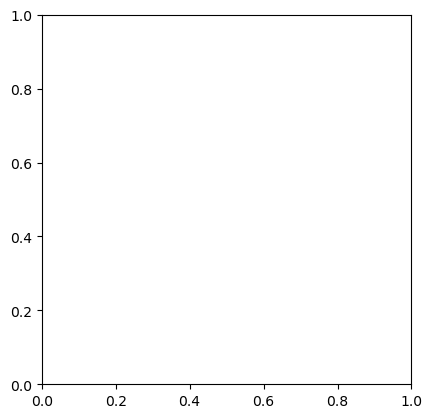

In [14]:
img, y = ds[75]
print(type(img), img.shape)
plt.imshow(img, cmap='gray')

In [1]:
from superpixel_graphs.datasets import SuperPixelGraphMNIST

In [2]:
test_ds  = SuperPixelGraphMNIST(root=None, 
                                n_segments=75,
                                compactness=0.1,
                                features=None,
                                graph_type='16NNSpatial',
                                slic_method='SLIC0',
                                train=False,
                                pre_select_features=False)

extension available:  True
Loading 10000 images with n_segments = 75 ...
Computing features: 


Processing...


Done in 40.623467206954956s
Selected features for 16NNSpatial graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid
MNIST Loaded.
Average number of nodes: 80.7138 with standard deviation 0.6385057243282944
Average number of edges: 2582.8416 with standard deviation 20.432183178505422


Done!


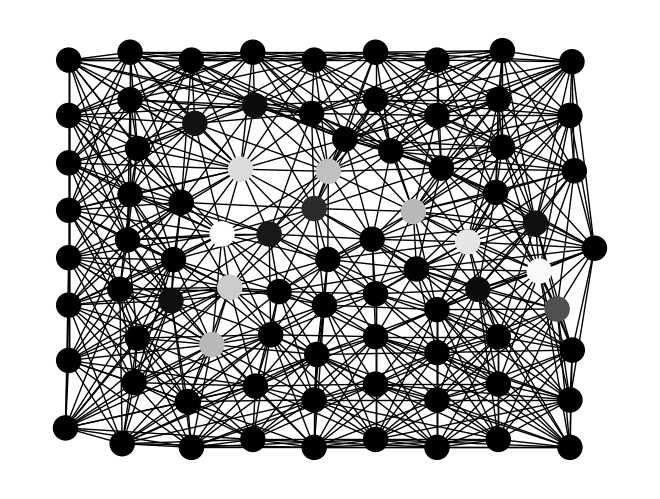

In [4]:
import networkx as nx
from torch_geometric.utils import to_networkx

index = 0
g = test_ds[index]
pos = g.pos.numpy()
features = g.x.numpy()

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')

In [5]:
from superpixel_graphs.datasets import SuperPixelGraphCIFAR10